# COMP8420 Advanced Natural Language Processing
## Week 1 - Setting Up the Environment, Data Pre-processing & Classification

## Today's Topics
- Jupyter Notebook
- Environment & Dependencies
- Text Data Pre-processing
- Classification & Logistic regression

### 1. Jupyter Notebook

[Jupyter Notebook](https://jupyter.org/) is an interactive development environment that supports **real-time code execution and text presentation**.  

Due to its convenience, ease of use for running demos, and efficiency in obtaining results, it is widely used in the machine learning community.  

For our workshops, we will use **Google Colab**, a cloud-based implementation of Jupyter Notebook. Alternatively, Jupyter Notebook can be installed locally by following the instructions at [Jupyter's official site](https://jupyter.org/install).

#### Cells

Notebooks consist of two types of cells: *text cells* and *code cells*.  

**Text cells**: This cell is an example of a text cell. It supports markup languages such as Markdown, HTML, and LaTeX, allowing you to format plain text, add [hyperlinks](https://www.markdownguide.org/getting-started/), display equations (e.g., $y = wx + b$), create tables, insert images, and more.  

You can edit a text cell by *double-clicking* on it. Press `<Shift> + <Enter>`  to render the formatted content.

**Code cells**: Jupyter Notebook supports multiple programming languages, referred to as **kernels** in Jupyter terminology. In this course, we will primarily use **Python 3**, as it is widely adopted in the machine learning and data science communities.  

The following cell is an example of a code cell. You can execute it in several ways:  
- Click the *Run* ▶ button (visible when you hover over the cell).  
- Press `<Shift> + <Enter>` to run the cell and move to the next one.  
- Press `<Ctrl> + <Enter>` to run the cell without advancing.  

To execute all cells at once, select *Run all* from the *Runtime* menu in the top right of the UI.

In [8]:
"""Print messages"""

message = "Welcome to COMP8420 Advanced Natural Language Processing!"
border = "*" * (len(message) + 6)

# Print the formatted message
print(border)
print(f"*  {message}  *")
print(border)

***************************************************************
*  Welcome to COMP8420 Advanced Natural Language Processing!  *
***************************************************************


In [9]:
!pip install matplotlib

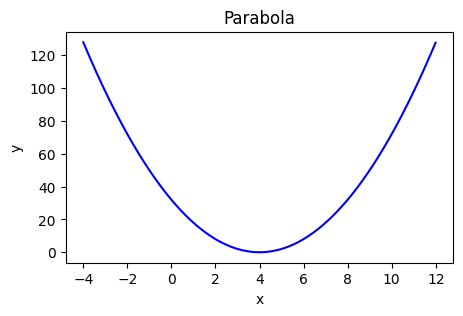

In [10]:
"""Interactively visualize data points"""

import matplotlib.pyplot as plt
import numpy as np

#### Parameters you can easily change ####
center = 4
width = 2
view_range = 8
##########################################

# Create the points to plot
x = np.arange(center - view_range, center + view_range, 0.01)
y = width * (x - center)**2

# Create the plot
plt.figure(figsize=(5, 3))
plt.plot(x, y, label=f"y = {width}(x - {center})$^2$", color='blue', linestyle='-')
plt.ylabel("y")
plt.xlabel("x")
plt.title("Parabola")

#### What else configs can be set for the plot? ####
## Q1. How to add grid lines?


## Q2. How to set a legend?

####################################################

plt.show()

### 2. Environment & Dependencies

A machine learning development environment is your complete workspace setup, primarily consisting of:
- Python distribution (e.g., Python 2/3, and specific versions like Python 3.10)
- Essential dependency packages (e.g., NumPy, Pandas, scikit-learn)  

An isolated environment enables you to manage dependencies needed for running program, without writing every function from scratch.

Google Colab has an embedded environment, which installs most widely used packages by default.

By running the cell below, you can verify whether some basic packages are installed and what their installed versions are:

In [2]:
"""Verify installation and version of pakcages"""

import sys
print(f"Python version: {sys.version}")

try:
    import torch
    print(f"PyTorch version: {torch.__version__}")
except ImportError:
    print("PyTorch is not installed!")

try:
    import transformers
    print(f"Transformers version: {transformers.__version__}")
except ImportError:
    print("Transformers is not installed!")

Python version: 3.12.9 | packaged by Anaconda, Inc. | (main, Feb  6 2025, 18:56:27) [GCC 11.2.0]
PyTorch version: 2.6.0+cu124


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Transformers version: 4.39.3


If any additional packages need to be installed, use `!pip install <package_name>` to run a shell command within the notebook.

In [4]:
import transformers
print(transformers.__version__)


4.39.3


In [5]:
!pip install evaluate

As a free cloud service, Google Colab **will not** preserve the state of your custom-installed packages. Therefore, it is also a good practice to install development environments on your own computer.

#### Anaconda (Python + ML Package Manager)

[Anaconda Distribution](https://www.anaconda.com/) provides an environment manager called *conda*, and is still one of the most widely adopted tool for machine learning practitioners to manage their environments and dependencies.

It can be downloaded from its [official website](https://www.anaconda.com/download/success). Two versions are available:
- Anaconda: Full distribution with pre-installed data science packages
- Miniconda: Lightweight version with only conda and its dependencies

You can then create your own working environment and install packages after installing Anaconda or Miniconda.

Here are example command line codes to set up the env in your local computer:


- Create and activate new environment
```bash
conda create -n nlp-env python=3.10
conda activate nlp-env  
```

- Install core data science packages  
```bash
conda install numpy pandas matplotlib scikit-learn jupyter notebook
```

- Install NLP packages, PyTorch and Hugging Face packages   
```bash
pip install nltk spacy gensim  
pip install torch torchvision torchaudio
pip install transformers datasets evaluate sentencepiece
```

**Let's have a practice, please:**

>- Step 1: Download and install Anaconda distribution
>- Step 2: Create an environment (either from anaconda interface or terminal)
>- Step 3: Install a package, e.g., Numpy

> **💡 (Optional) Think About It:** To ensure project reproducibility:
> - How can you export your environment configuration? (Hint: Try searching `conda env export` or `pip freeze`)
> - What's the difference between requirements.txt and environment.yml?
> - How do you recreate an environment from these files?

### 3. Text Data Pre-processing


Text data, often collected from the web, is typically **unstructured** and contains elements like HTML symbols that make it challenging to analyze directly. Therefore, data preprocessing is a crucial first step in any text processing task.

In this workshop, we'll explore preprocessing techniques using HTML-formatted data collected from the subject's iLearn webpage.

This hands-on example will demonstrate common cleaning and transformation steps needed to prepare web text for analysis.

In [6]:
corpus = '''
<div class="summary"><div class="no-overflow"><p dir="ltr" style="text-align: left;"></p><strong>
Welcome to COMP8420 Advanced Natural Language Processing!<br></strong><br>
The last few years have seen very rapid improvements in the ability of computers to understand
spoken and written text, and to create and translate. A lot of this improvement has come from one innovation:
Transformers. In this unit we will deep-dive on to the Transformer architecture, and cover applications of
Transformers (and other techniques) in industry and beyond.<br><br><br></div></div>
'''

Those HTML-formatted symbols could be irrelevant to the text processing task, so we can use a [Regular Expression (Regex)](https://www.geeksforgeeks.org/python-substituting-patterns-in-text-using-regex/) to remove them and obtain a cleaner version.

In [7]:
import re

## Syntax of RegEx(Regular expression): re.sub(pattern, replacement, string)
pattern="<[^>]+>"
document = re.sub(pattern, "", corpus)
document = " ".join(document.split())

print('\n',document)


 Welcome to COMP8420 Advanced Natural Language Processing! The last few years have seen very rapid improvements in the ability of computers to understand spoken and written text, and to create and translate. A lot of this improvement has come from one innovation: Transformers. In this unit we will deep-dive on to the Transformer architecture, and cover applications of Transformers (and other techniques) in industry and beyond.


There is also a famous tool named [Natural Language Toolkit (NLTK)](https://www.nltk.org/) that is frequently used to conduct text data pre-processing, including sentence segmentation, tokenization, removing stop words, lemmatization and so on.

In [8]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [9]:
import nltk
nltk.download(['punkt_tab'])

[nltk_data] Downloading package punkt_tab to /home/amir/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [10]:
"""Sentence segmentation"""
from nltk.tokenize import sent_tokenize

sentences = sent_tokenize(document)
for sentence in sentences:
    print(sentence)

Welcome to COMP8420 Advanced Natural Language Processing!
The last few years have seen very rapid improvements in the ability of computers to understand spoken and written text, and to create and translate.
A lot of this improvement has come from one innovation: Transformers.
In this unit we will deep-dive on to the Transformer architecture, and cover applications of Transformers (and other techniques) in industry and beyond.


We can also use regular expression to split the paragraph into sentences:

In [11]:
simple_sentences = re.split(r'[.!?]', document)

for sentence in simple_sentences:
    print(sentence)

Welcome to COMP8420 Advanced Natural Language Processing
 The last few years have seen very rapid improvements in the ability of computers to understand spoken and written text, and to create and translate
 A lot of this improvement has come from one innovation: Transformers
 In this unit we will deep-dive on to the Transformer architecture, and cover applications of Transformers (and other techniques) in industry and beyond



What could be the problem to use hardcoded regular expression rules to split the sentences?

In [12]:
from nltk.tokenize import sent_tokenize

text = "Dr. Smith went to Washington D.C. Yesterday was his birthday."

## Question: can you think of any other examples?
text = " "

regex_sentences = re.split(r'[.!?]', text)
nltk_sentences = sent_tokenize(text)

print(regex_sentences)
print(nltk_sentences)

[' ']
[]


Text data are generally processed at the token level, so we should continue to chunk the sentences into a fine-grained level, using techniques called tokenization.

In [13]:
"""Tokenization"""

from nltk.tokenize import word_tokenize

tokenized_sentence = word_tokenize(sentences[3])

print(sentences[3].split(" "))
print(tokenized_sentence)

['In', 'this', 'unit', 'we', 'will', 'deep-dive', 'on', 'to', 'the', 'Transformer', 'architecture,', 'and', 'cover', 'applications', 'of', 'Transformers', '(and', 'other', 'techniques)', 'in', 'industry', 'and', 'beyond.']
['In', 'this', 'unit', 'we', 'will', 'deep-dive', 'on', 'to', 'the', 'Transformer', 'architecture', ',', 'and', 'cover', 'applications', 'of', 'Transformers', '(', 'and', 'other', 'techniques', ')', 'in', 'industry', 'and', 'beyond', '.']


Similary, we can have more examples to check the differences between direct split, and the NLTK tokenizer.

In [14]:
text = "I don't want to go. It's too late."

# split
print(text.split())

# NLTK word_tokenize
print(word_tokenize(text))

['I', "don't", 'want', 'to', 'go.', "It's", 'too', 'late.']
['I', 'do', "n't", 'want', 'to', 'go', '.', 'It', "'s", 'too', 'late', '.']


In [15]:
nltk.download('averaged_perceptron_tagger_eng')

part_of_speech_tag = nltk.pos_tag(tokenized_sentence)
print(part_of_speech_tag)

[('In', 'IN'), ('this', 'DT'), ('unit', 'NN'), ('we', 'PRP'), ('will', 'MD'), ('deep-dive', 'VB'), ('on', 'IN'), ('to', 'TO'), ('the', 'DT'), ('Transformer', 'NNP'), ('architecture', 'NN'), (',', ','), ('and', 'CC'), ('cover', 'NN'), ('applications', 'NNS'), ('of', 'IN'), ('Transformers', 'NNP'), ('(', '('), ('and', 'CC'), ('other', 'JJ'), ('techniques', 'NNS'), (')', ')'), ('in', 'IN'), ('industry', 'NN'), ('and', 'CC'), ('beyond', 'IN'), ('.', '.')]


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/amir/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


You can find more details of part-of-speech tags in [Penn TreeBank project](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) and also [NLTK tutorial](https://www.nltk.org/book/ch05.html).

Additionally, classical NLP techniques studied to remove 'not-so-important' tokens, such as stop words ('in', 'the' etc.), from the sentence to keep focus on key features.

In [16]:
"""Removing stop-words and lemmatization"""

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))

filtered_tokens = [word for word in tokenized_sentence if word.lower() not in stop_words]

lemmatizer = WordNetLemmatizer()

lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

print("Original:", tokenized_sentence)
print("After removing stop words:", filtered_tokens)
print("After lemmatization:", lemmatized_tokens)

[nltk_data] Downloading package stopwords to /home/amir/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/amir/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original: ['In', 'this', 'unit', 'we', 'will', 'deep-dive', 'on', 'to', 'the', 'Transformer', 'architecture', ',', 'and', 'cover', 'applications', 'of', 'Transformers', '(', 'and', 'other', 'techniques', ')', 'in', 'industry', 'and', 'beyond', '.']
After removing stop words: ['unit', 'deep-dive', 'Transformer', 'architecture', ',', 'cover', 'applications', 'Transformers', '(', 'techniques', ')', 'industry', 'beyond', '.']
After lemmatization: ['unit', 'deep-dive', 'Transformer', 'architecture', ',', 'cover', 'application', 'Transformers', '(', 'technique', ')', 'industry', 'beyond', '.']


#### **Tokens are still in text format; how can we transform them into numerical representations, which can be used for downstream tasks?**

In [17]:
"""Transform text data into Bag-of-words representation"""

from sklearn.feature_extraction.text import CountVectorizer

print("Original sentences:", sentences, "\n")

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sentences)

print("Feature names (vocabulary):\n", vectorizer.get_feature_names_out(), "\n")
print("Bag-of-word representation:", X.toarray())

Original sentences: ['Welcome to COMP8420 Advanced Natural Language Processing!', 'The last few years have seen very rapid improvements in the ability of computers to understand spoken and written text, and to create and translate.', 'A lot of this improvement has come from one innovation: Transformers.', 'In this unit we will deep-dive on to the Transformer architecture, and cover applications of Transformers (and other techniques) in industry and beyond.'] 

Feature names (vocabulary):
 ['ability' 'advanced' 'and' 'applications' 'architecture' 'beyond' 'come'
 'comp8420' 'computers' 'cover' 'create' 'deep' 'dive' 'few' 'from' 'has'
 'have' 'improvement' 'improvements' 'in' 'industry' 'innovation'
 'language' 'last' 'lot' 'natural' 'of' 'on' 'one' 'other' 'processing'
 'rapid' 'seen' 'spoken' 'techniques' 'text' 'the' 'this' 'to'
 'transformer' 'transformers' 'translate' 'understand' 'unit' 'very' 'we'
 'welcome' 'will' 'written' 'years'] 

Bag-of-word representation: [[0 1 0 0 0 0 0 

In [18]:
"""Transform text data into TF-IDF representation"""
from sklearn.feature_extraction.text import TfidfVectorizer

print("Original sentences:", sentences, "\n")

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sentences)

print("Feature names (vocabulary):\n", vectorizer.get_feature_names_out(), "\n")
print("TF-IDF representation:", X.toarray())

Original sentences: ['Welcome to COMP8420 Advanced Natural Language Processing!', 'The last few years have seen very rapid improvements in the ability of computers to understand spoken and written text, and to create and translate.', 'A lot of this improvement has come from one innovation: Transformers.', 'In this unit we will deep-dive on to the Transformer architecture, and cover applications of Transformers (and other techniques) in industry and beyond.'] 

Feature names (vocabulary):
 ['ability' 'advanced' 'and' 'applications' 'architecture' 'beyond' 'come'
 'comp8420' 'computers' 'cover' 'create' 'deep' 'dive' 'few' 'from' 'has'
 'have' 'improvement' 'improvements' 'in' 'industry' 'innovation'
 'language' 'last' 'lot' 'natural' 'of' 'on' 'one' 'other' 'processing'
 'rapid' 'seen' 'spoken' 'techniques' 'text' 'the' 'this' 'to'
 'transformer' 'transformers' 'translate' 'understand' 'unit' 'very' 'we'
 'welcome' 'will' 'written' 'years'] 

TF-IDF representation: [[0.         0.395056

### 4. Classification Task & Logistic regression

A classification task aims to map specific data points to predefined labels (e.g., positive/negative, spam/not spam).

In this notebook, we'll explore this concept using a classic machine learning problem: predicting passenger survival on the Titanic.

In [19]:
# Uncomment and run following code, if it is not installed.
# !pip install datasets

In [20]:
"""Let's first load the Titanic dataset from a platform named Hugging Face"""

import torch
import pandas as pd
from datasets import load_dataset

titanic_data = load_dataset("Tomate/Kaggle-Titanic")
titanic_df = titanic_data["train"].to_pandas()

print(titanic_df.iloc[0].keys())
titanic_df.head()

train.csv:   0%|          | 0.00/60.3k [00:00<?, ?B/s]

test.csv:   0%|          | 0.00/28.2k [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S


**Questions:**

>- Q1: What features could be important for the classification task?
>- Q2: How can we transform the data format to make it suitable for training?

In [29]:
"""Data preprocessing"""

## Question: what features can we choose?
selected_features = ['Sex', 'Pclass', 'Age','Fare','SibSp','Parch']

# Convert categorical to numeric using pandas get_dummies
df_encoded = pd.get_dummies(titanic_df[selected_features], columns=['Sex'])
features = df_encoded.fillna(0)  # Fill missing values
targets = titanic_df['Survived']

# Show an example of transformed data
print("Original sample:")
print(titanic_df.iloc[0][selected_features])
print("\nTransformed sample:")
print(features.iloc[0])

Original sample:
Sex       male
Pclass       3
Age       22.0
Fare      7.25
SibSp        1
Parch        0
Name: 0, dtype: object

Transformed sample:
Pclass            3
Age            22.0
Fare           7.25
SibSp             1
Parch             0
Sex_female    False
Sex_male       True
Name: 0, dtype: object


Before training a classifier, we can reserve some data points as a development validation set to further evaluate the model performance.

In [28]:
"""Split data into training and development sets"""

from sklearn.model_selection import train_test_split

# Split with 90% training and 10% development data
X_train, X_dev, y_train, y_dev = train_test_split(features, targets, test_size=0.1, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Development set: {X_dev.shape[0]} samples")

Training set: 801 samples
Development set: 90 samples


Another important point: different features may have values of varying magnitudes, so it is common to standardize the features to the same distribution.

In [31]:
"""Feature Standardization"""
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_dev_scaled = scaler.transform(X_dev)

sample_idx = 2  # Select a sample to check the details
original_sample = X_train.iloc[sample_idx]
scaled_sample = pd.Series(X_train_scaled[sample_idx], index=X_train.columns)

print("Before standardization:")
print(original_sample)
print("\nAfter standardization:")
print(scaled_sample)
print("\nMean and standard deviation of training features:")
print(f"Means: {np.round(scaler.mean_, 2)}")
print(f"Standard deviations: {np.round(scaler.scale_, 2)}")

Before standardization:
Pclass              1
Age              61.0
Fare          32.3208
SibSp               0
Parch               0
Sex_female      False
Sex_male         True
Name: 625, dtype: object

After standardization:
Pclass       -1.592229
Age           2.107043
Fare          0.003970
SibSp        -0.470964
Parch        -0.466439
Sex_female   -0.727067
Sex_male      0.727067
dtype: float64

Mean and standard deviation of training features:
Means: [ 2.32 23.73 32.12  0.53  0.38  0.35  0.65]
Standard deviations: [ 0.83 17.69 50.24  1.13  0.81  0.48  0.48]


We can then train a logistic regression model, using the processing feature data (*X_train_scales*) and labels (*y_train*).

In [34]:
"""Train a logistic regression clapip install transformers
ssifier"""

from sklearn.linear_model import LogisticRegression

# Create and train the logistic regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

## Question: We will use fit function to train the model, but what args should be input?
lr_model.fit(X_train_scaled,y_train)

print("Logistic Regression Model Parameters:")
print(f"Weights: {lr_model.coef_}")
print(f"Bias: {lr_model.intercept_}")

Logistic Regression Model Parameters:
Weights: [[-0.78019644 -0.2527774   0.1381524  -0.33777604 -0.04478032  0.64371883
  -0.64371883]]
Bias: [-0.63669662]


In [35]:
"""Make prediction on the development set"""

y_pred = lr_model.predict(X_dev_scaled)
y_pred_proba = lr_model.predict_proba(X_dev_scaled)

# Show prediction for one example
example_idx = 10
print(f"Features of the selected dev sample: \n{X_dev.iloc[example_idx]}")
print(f"\nTrue label: {y_dev.iloc[example_idx]}")
print(f"Predicted label: {y_pred[example_idx]}")
print(f"Prediction probabilities [Not Survived, Survived]: {y_pred_proba[example_idx]}")

Features of the selected dev sample: 
Pclass            1
Age            37.0
Fare           53.1
SibSp             1
Parch             0
Sex_female    False
Sex_male       True
Name: 137, dtype: object

True label: 0
Predicted label: 0
Prediction probabilities [Not Survived, Survived]: [0.64142665 0.35857335]


We can get a comprehensive evaluation results using `scikit-learn` package.

In [37]:
from sklearn.metrics import classification_report

def evaluate_performance(y_true, y_pred):
    """Create and print the classification report"""
    performance = classification_report(
        y_true, y_pred,
        target_names=["Not Survived", "Survived"]
    )
    print(performance)

print("Model performance on development set:")

## Practice: input the correct variables to print the evaluation results.
evaluate_performance(y_dev,y_pred )

Model performance on development set:
              precision    recall  f1-score   support

Not Survived       0.84      0.80      0.82        54
    Survived       0.72      0.78      0.75        36

    accuracy                           0.79        90
   macro avg       0.78      0.79      0.78        90
weighted avg       0.79      0.79      0.79        90



> 💡 **About Dataset Collection & Loading:**
> - HuggingFace is one of the convenient methods to find and load datasets. The `datasets` library provides a simple `load_dataset()` API to directly load datasets from the Hugging Face Hub. For example:
>   ```python
>   from datasets import load_dataset
>   dataset = load_dataset("glue", "cola")  # Load the CoLA dataset
>   ```
> - Datasets can also be loaded from local files with formats like CSV, JSON, and TSV using various methods:
>   ```python
>   # Read CSV using pandas
>   import pandas as pd
>   df = pd.read_csv("path/to/data.csv")
>   
>   # Read JSON file
>   import json
>   with open("path/to/data.json", "r") as f:
>       data = json.load(f)
>   
>   # Read TSV using pandas
>   df = pd.read_csv("path/to/data.tsv", sep="\t")
>   ```
> - Other possible sources include [Kaggle](https://www.kaggle.com/datasets) and official dataset websites [(e.g., CoLA)](https://nyu-mll.github.io/CoLA/). You can explore any of these resources as long as you give credit to the original creators.

## **This workshop aims to help you:**

- Set up your environment (e.g., using conda) and install required packages
- Import and use libraries in Python programs
- Work with text data pre-processing basics
- Refresh the knowledge of build a logistic regression classifier